In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Taking small step using gradient step
def MSEStep(X, y, W, b, learn_rate = 0.005):

    y_pred = np.matmul(X, W) + b
    error = y - y_pred

    W_new = W + learn_rate * np.matmul(error, X)
    b_new = b + learn_rate * error.sum()
    
    return W_new, b_new


In [22]:
# Cetting batches of data and applying the weight changes 
def miniBatch(X, y, batch_size=20, num_iter=25, learn_rate=0.005):
    
    n_points = X.shape[0] # total number of points
    
    W = np.zeros(X.shape[1]) # intialising weight or slope
    b = 0 # intercept
    
    regression_coeff = [np.hstack((W,b))]
    
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = Y[batch,-1]
        
        # print("X_batch = ", X_batch.shape,",y_batch = ",y_batch.shape)
        
        W, b = MSEStep(X_batch, y_batch, W, b)
        regression_coeff.append(np.hstack((W,b)))
    
    return regression_coeff

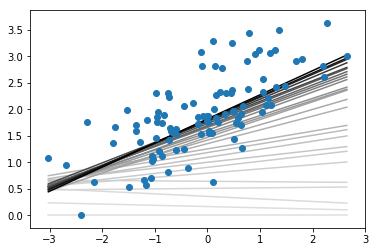

In [24]:
if __name__ == "__main__":
    data = np.loadtxt("data.csv", delimiter=",")
    X = data[:,:-1]
    Y = data[:,1:]
    regression_coeff = miniBatch(X,Y)

    plt.figure()
    X_min = X.min()
    X_max = X.max()
    counter = len(regression_coeff)
    
    for W, b in regression_coeff:
        counter -= 1
        # print(W,b)
        color = [1 - 0.92 ** counter for _ in range(3)]
        # print(color)
        plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
    plt.scatter(X, Y, zorder = 3)
    plt.show()